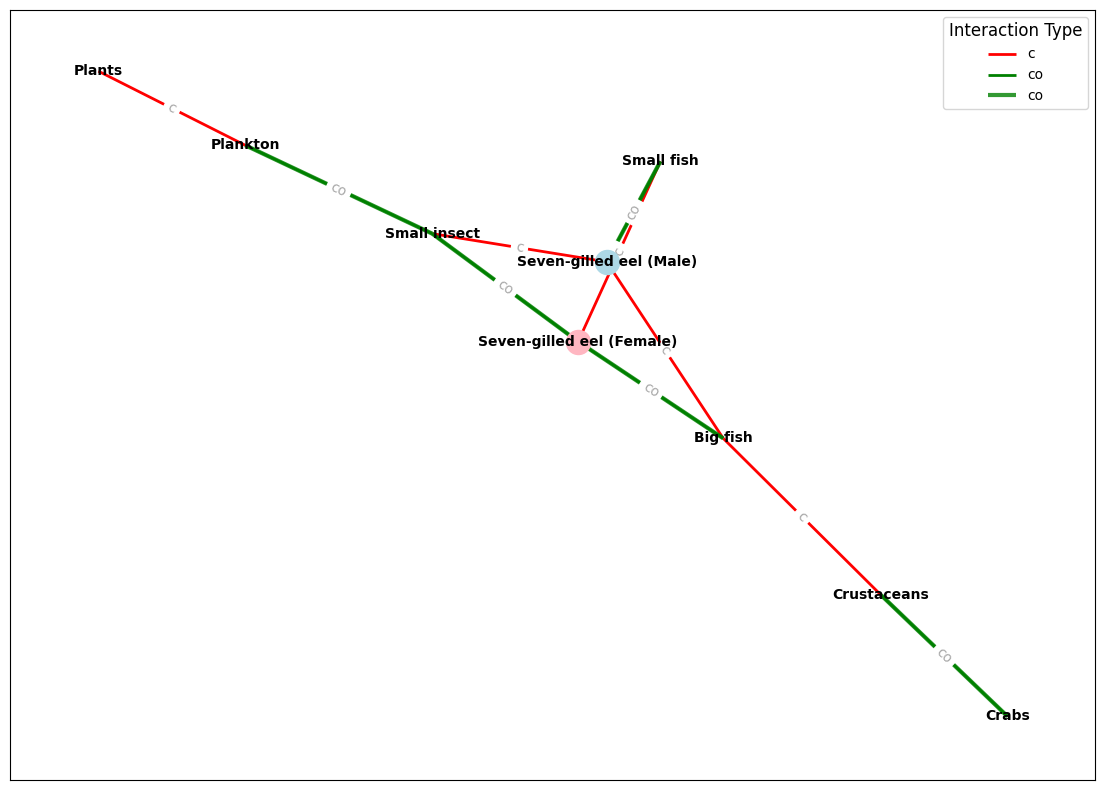

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph to represent competition and cooperation relationships
G = nx.Graph()

# Define nodes for male and female eels
male_eels = ['Seven-gilled eel (Male)'] * 3  # Assuming 3 male eels for illustration
female_eels = ['Seven-gilled eel (Female)'] * 3  # Assuming 3 female eels for illustration
organisms = ['Big fish', 'Small insect', 'Small fish', 'Crustaceans', 'Crabs', 'plankton', 'Plants']

# Add nodes to the bipartite graph
G.add_nodes_from(male_eels, bipartite=0)
G.add_nodes_from(female_eels, bipartite=1)
G.add_nodes_from(organisms, bipartite=1)

# Define edges to represent interactions with labels indicating competitor (c) or cooperation (Co)
edges = [
    ('Seven-gilled eel (Male)', 'Big fish', {'label': 'c'}),
    ('Seven-gilled eel (Male)', 'Small insect', {'label': 'c'}),
    ('Seven-gilled eel (Male)', 'Small fish', {'label': 'co'}),
    ('Seven-gilled eel (Female)', 'Big fish', {'label': 'co'}),
    ('Seven-gilled eel (Female)', 'Small insect', {'label': 'co'}),
    ('Seven-gilled eel (Female)', 'Small fish', {'label': 'c'}),
    ('Big fish', 'Crustaceans', {'label': 'c'}),
    ('Crustaceans', 'Crabs', {'label': 'co'}),
    ('Small insect', 'Plankton', {'label': 'co'}),
    ('Plankton', 'Plants', {'label': 'c'}),
    # Add other interactions...
]

# Add edges to the bipartite graph
G.add_edges_from(edges)

# Draw the bipartite graph with different edge colors for competition and cooperation
pos = nx.spring_layout(G, iterations=200, seed=42)

edge_colors = {'c': 'red', 'co': 'green'}
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}

# Increase figure size for better visualization
plt.figure(figsize=(14, 10))

# Draw nodes with different colors for male and female eels
node_colors = {'Seven-gilled eel (Male)': 'lightblue', 'Seven-gilled eel (Female)': 'lightpink'}
for node, color in node_colors.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color)

# Draw edges with different colors based on their labels and add labels
for edge, color in edge_colors.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d['label'] == edge]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, label=edge, width=2)

# Draw 'co' edges with increased intensity
co_edges = [(u, v) for u, v, d in G.edges(data=True) if d['label'] == 'co']
nx.draw_networkx_edges(G, pos, edgelist=co_edges, edge_color='green', alpha=0.8, width=3, label='co')

# Draw labels for nodes and edges
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkgray')

# Add legend
plt.legend(title='Interaction Type', title_fontsize=12)

# Display the plot
plt.show()
